You are given a `rows x cols` matrix `grid` representing a field of cherries where `grid[i][j]` represents the number of cherries that you can collect from the `(i, j)` cell.

You have two robots that can collect cherries for you:
- **Robot #1** is located at the **top-left corner** `(0, 0)`, and
- **Robot #2** is located at the **top-right corner** `(0, cols - 1)`.

Return *the maximum number of cherries collection using both robots by following the rules below:*
- From a cell `(i, j)`, robots can move to cell `(i + 1, j - 1)`, `(i + 1, j)`, or `(i + 1, j + 1)`.
- When any robot passes through a cell, It picks up all cherries, and the cell becomes an empty cell.
- When both robots stay in the same cell, only one takes the cherries.
- Both robots cannot move outside of the grid at any moment.
- Both robots should reach the bottom row in `grid`.
 
<br>

**Example 1:**

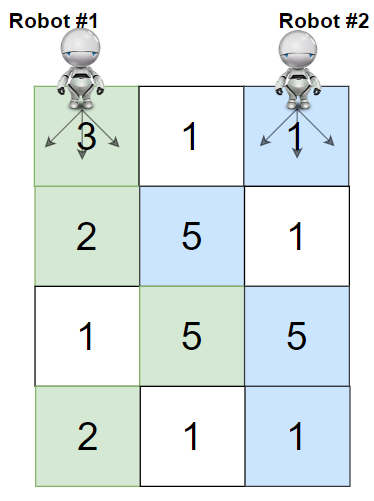

>**Input:** grid = [[3,1,1],[2,5,1],[1,5,5],[2,1,1]]<br>
>**Output:** 24<br>
>**Explanation:** Path of robot #1 and #2 are described in color green and blue respectively.<br>
>Cherries taken by Robot #1, (3 + 2 + 5 + 2) = 12.<br>
>Cherries taken by Robot #2, (1 + 5 + 5 + 1) = 12.<br>
>Total of cherries: 12 + 12 = 24.


**Example 2:**

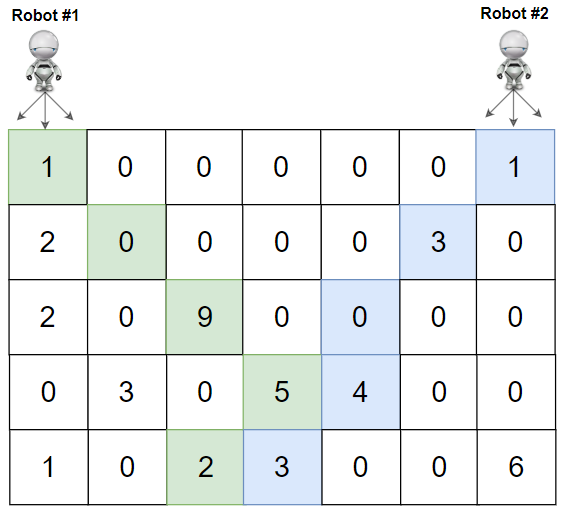

>**Input:** grid = [[1,0,0,0,0,0,1],[2,0,0,0,0,3,0],[2,0,9,0,0,0,0],[0,3,0,5,4,0,0],[1,0,2,3,0,0,6]]<br>
>**Output:** 28<br>
>**Explanation:** Path of robot #1 and #2 are described in color green and blue respectively.<br>
>Cherries taken by Robot #1, (1 + 9 + 5 + 2) = 17.<br>
>Cherries taken by Robot #2, (1 + 3 + 4 + 3) = 11.<br>
>Total of cherries: 17 + 11 = 28.

<br>

**Constraints:**
- >rows == grid.length
- >cols == grid[i].length
- >2 <= rows, cols <= 70
- >0 <= grid[i][j] <= 100

In [1]:
class Solution:
    def cherryPickup(self, grid: list[list[int]]) -> int:
        rows, cols = len(grid), len(grid[0])

        dp = [[[-1] * cols for _ in range(cols)] for _ in range(rows)]

        def helper(row, col1, col2):
            if row == rows:
                return 0
            
            if dp[row][col1][col2] != -1:
                return dp[row][col1][col2]
            
            cherries = grid[row][col1]
            if col1 != col2:
                cherries += grid[row][col2]

            max_cherries = 0
            for move1 in [-1, 0, 1]:
                for move2 in [-1, 0, 1]:
                    new_col1, new_col2 = col1 + move1, col2 + move2

                    if 0 <= new_col1 < cols and 0 <= new_col2 < cols:
                        max_cherries = max(max_cherries, cherries + helper(row + 1, new_col1, new_col2))

            dp[row][col1][col2] = max_cherries
            return max_cherries
        
        return helper(0, 0, cols - 1)